## Librerías

In [12]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
import seaborn as sns
%matplotlib inline

## Carga de Datos

In [3]:
df = pd.read_excel('data/Datos Antropométricos.xlsx')

## Análisis Básico

In [4]:
df.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)","Sexo (H,M)",Edad
0,180,84,28.0,H,21
1,172,80,27.0,H,23
2,170,60,26.0,H,21
3,160,65,40.0,M,23
4,165,65,25.5,M,23


In [5]:
df.describe()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
count,39.000000,39.000000,39.000000,39.000000
mean,170.948718,71.923077,27.025641,23.076923
std,7.605222,13.604149,2.635658,2.287087
min,153.000000,43.000000,23.000000,21.000000
25%,166.500000,61.000000,26.000000,21.500000
50%,172.000000,72.000000,27.000000,23.000000
75%,175.500000,83.500000,28.000000,24.000000
max,184.000000,103.000000,40.000000,33.000000


In [13]:
df['Talla Zapato (27,28,etc)'].describe(percentiles=np.arange(0.90,1,0.01))

count    39.000000
mean     27.025641
std       2.635658
min      23.000000
50%      27.000000
90%      28.500000
91%      28.500000
92%      28.500000
93%      28.670000
94%      28.860000
95%      29.100000
96%      29.480000
97%      29.860000
98%      32.400000
99%      36.200000
max      40.000000
Name: Talla Zapato (27,28,etc), dtype: float64

In [15]:
df = df.loc[ df['Talla Zapato (27,28,etc)']<=30 ] #Se queda unicamente con las tallas de zapato menores a 30

In [16]:
df.reset_index( drop=True , inplace=True )

In [17]:
df.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)","Sexo (H,M)",Edad
0,180,84,28.0,H,21
1,172,80,27.0,H,23
2,170,60,26.0,H,21
3,165,65,25.5,M,23
4,154,50,23.5,M,26


In [18]:
df.shape

(38, 5)

## Reducción de Dimensiones

### Definición de escala de variables

In [21]:
varc = [v for v in df.columns if v!='Sexo (H,M)']
vard = ['Sexo (H,M)']
vard

['Sexo (H,M)']

### Matriz de Trabajo

In [27]:
X = df[varc].copy()

In [28]:
X.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
0,180,84,28.0,21
1,172,80,27.0,23
2,170,60,26.0,21
3,165,65,25.5,23
4,154,50,23.5,26


### Escalamiento Multidimensional

In [29]:
mds= MDS(n_components=2,n_jobs=-1)

In [30]:
Xm = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])

In [34]:
Xm[ vard[0] ] = df[vard[0]] 

### Visualización en dos dimensiones

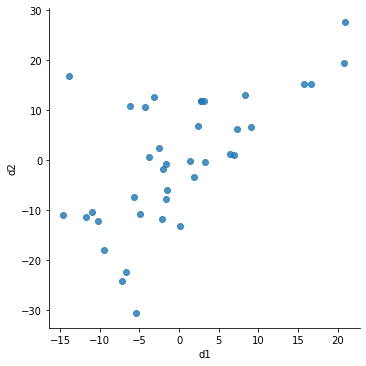

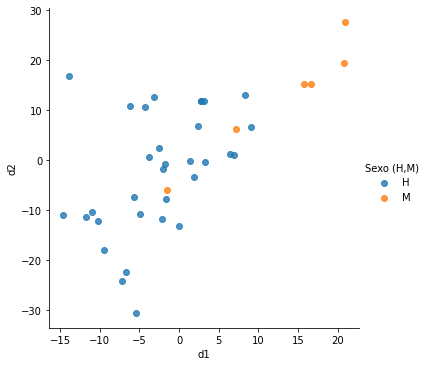

In [35]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue=vard[0])